[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_11_Regressao_Linear.ipynb)

# Aula 11 - Regressão Linear

**Objetivo**: Aprender o que é Regressão Linear e introduzir intuições sobre o Método do Gradiente e o Método do Gradiente Estocástico

## Defininição - Regressão Linear

> Uma regressão linear faz uma predição simplesmente computando uma soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*).

<img src="images/reg-linear.png" alt="reg-linear" style="width: 400px;"/>

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$$

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)

### Exemplo

$\mathrm{preço~de~residência} = 4500 + 1000\times \mathrm{quartos} + 120 \times \mathrm{m}^2 + 3000 \times \mathrm{banheiros}$

## Métricas de Desempenho de uma Regressão

<img src="images/erro-reg.png" alt="erro-reg" style="width: 400px;"/>

### *Mean Squared Error* (MSE) - Erro Quadrático Médio

$$MSE = \frac{1}{n}\Sigma_{i=1}^{n}{(\hat{y}_i - y_i)^2}$$

### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
$$MSE = \frac{1}{n}\Sigma_{i=1}^{n}{|\hat{y}_i - y_i|}$$

<img src="images/gradient-descent.gif" alt="gradient-descent-animation" style="width: 500px;"/>

<img src="images/gradient-descent-2.gif" alt="gradient-descent-animation" style="width: 500px;"/>

## Exemplo com o dataset [Boston House Prices](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)


* $N = 506$
* Atributos: 13
    * `CRIM` crime per capita da região
    * `ZN` proporção de terra residencial
    * `INDUS` proporção terra comercial não-varejista
    * `CHAS` *Dummy* se fica as margens do Charles River (1 ou 0)
    * `NOX` concentração de óxido nítrico (partes por 10 milhões)
    * `RM` número de quartos
    * `AGE` idade da residência
    * `DIS` distância dos cinco centros de emprego de Boston
    * `RAD` acessibilidade às rodovias radiais
    * `TAX` valor do IPTU por 10,000 USD
    * `PTRATIO` relação aluno-professor (*pupil-teacher ratio*) da região
    * `B` proporção de afro-descendentes na região
    * `LSTAT` porcentagem de população de baixa-renda
* Variável dependente: valor da casa

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston['data']
y = boston['target']

In [2]:
print('Nomes dos Atributos: ', boston['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')

Nomes dos Atributos:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Tamanho de X:  (506, 13) 

Tamanho de y:  (506,) 



### Quebrando dataset em `train` e `test`

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [4]:
print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (379, 13) 

Tamanho de X_test:  (127, 13) 

Tamanho de y_train:  (379,) 

Tamanho de y_test:  (127,) 



### Regressão Linear
Usar a função do Scikit-Learn [`sklearn.linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

#### Argumentos:
* `loss` - `str`
    * MSE - `'squared_loss'`
    * MAE - `'epsilon_insensitive'`
* `max_iter` - `int` - Número máximo de iterações do *Gradient Descent*
* `tol` - Tolerância - Critério de parada de treino
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)
* `eta0` - `float` - Taxa de aprendizagem inicial
    * padrão `0.01`
* `learning_rate` - `str` - Taxa de aprendizagem
    * Constante - `'constant'`
    * Adapatativa - `'adaptive'`
* `n_iter_no_change` - `int` - Somente se usar Taxa de Aprendizagem Adaptativa

#### Retorna:
* Objeto `estimator` do Scikit-Learn

In [118]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(loss='squared_loss', learning_rate='constant', max_iter=10,
                   eta0=0.01, verbose=1, tol=None, random_state=44)

### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X`
    * `y`
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

In [119]:
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 4663284538194.11, NNZs: 13, Bias: -12339864446.352757, T: 379, Avg. loss: 2101546146359921593646409842688.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9139455666606.25, NNZs: 13, Bias: -42339864446.352753, T: 758, Avg. loss: 2284069171112466020069728583680.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7156309155318.21, NNZs: 13, Bias: -52339864446.352753, T: 1137, Avg. loss: 2196791312613982204690392154112.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9766635924566.42, NNZs: 13, Bias: -22339864446.352753, T: 1516, Avg. loss: 2137359086217507186661667110912.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10097442373586.37, NNZs: 13, Bias: 7660135553.647247, T: 1895, Avg. loss: 2130901548081396029234278825984.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7905543931635.98, NNZs: 13, Bias: 37660135553.647247, T: 2274, Avg. loss: 2183585776104203845976486576128.000000
Total training time: 0.00 seconds.
-- Epoch

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=44,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [120]:
# Coeficientes do modelo
print(clf.coef_)

# Constante do modelo
print(clf.intercept_)

[ 1.54134778e+12  4.79452229e+12 -1.28474346e+12  2.39506752e+11
  3.53328016e+10 -5.97959426e+11  2.77308180e+11  5.65135851e+11
 -1.82789252e+12 -4.47138624e+12 -6.13358589e+11  2.25452978e+12
  6.07344223e+12]
[3.76601356e+10]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

clf =  clf.set_params(verbose=0)  # evitar prints adicionais

def mse(y_pred, y):
    """Retorna o MSE de duas NumPy Arrays"""
    mse = np.square(y_pred - y).mean()
    return mse

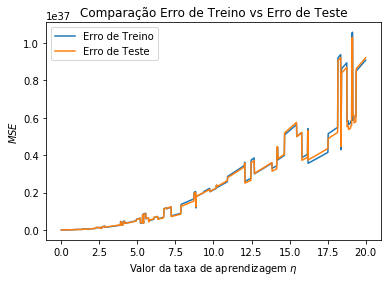

In [123]:
# inicia duas listas vazias
mse_train_values = []
mse_test_values = []

# Eixo X do grafico
x_axis = np.linspace(0.1e-10, 20, 1000)

for i in x_axis:
    clf_ =  clf.set_params(eta0=i)
    clf_.fit(X_train, y_train)
    
    y_train_pred = clf_.predict(X_train)
    mse_train = mse(y_train_pred, y_train)
    mse_train_values.append(mse_train)
    
    y_test_pred = clf_.predict(X_test)
    mse_test = mse(y_test_pred, y_test)
    mse_test_values.append(mse_test)
    

plt.plot(x_axis, mse_train_values, label='Erro de Treino')
plt.plot(x_axis, mse_test_values, label='Erro de Teste')
plt.xlabel('Valor da taxa de aprendizagem $\eta$')
plt.ylabel('$MSE$')
plt.legend()
plt.title('Comparação Erro de Treino vs Erro de Teste')
plt.show()

![mapa-conceitual](https://github.com/storopoli/ciencia-de-dados/raw/master/Mapas%20Conceituais/12%20-%20Regressao%20Linear.png)

## Atividade - Regressão com o dataset [Diabetes](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)

* $N = 442$
* Atributos: 10
    * `age`
    * `sex`
    * `bmi` Índice de Massa Corpórea (IMC) - *Body Mass Index* (BMI)
    * `bp` pressão arterial média *blood pressure* (bp)
    * `s1` colesterol total
    * `s2` colesterol LDL
    * `s3` colesterol HDL
    * `s4` colesterol VLDL
    * `s5` triglicerides
    * `s6` glicose
* Variável dependente: medida quantitativa de progressão da diabetes

* Achar o melhor `eta0` e os respectivos coeficientes dos atributos ($\theta_i$) e viés/constante ($\theta_0$)

>Obs: usar `test_size = 0.25` e `random_state = 123`

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']

In [ ]:
print('Nomes dos Atributos: ', diabetes['feature_names'], '\n')
print('Tamanho de X: ', X.shape, '\n')
print('Tamanho de y: ', y.shape, '\n')